In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(rc={'figure.figsize':(11,7)})

/tmp/ipykernel_794/1888597303.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


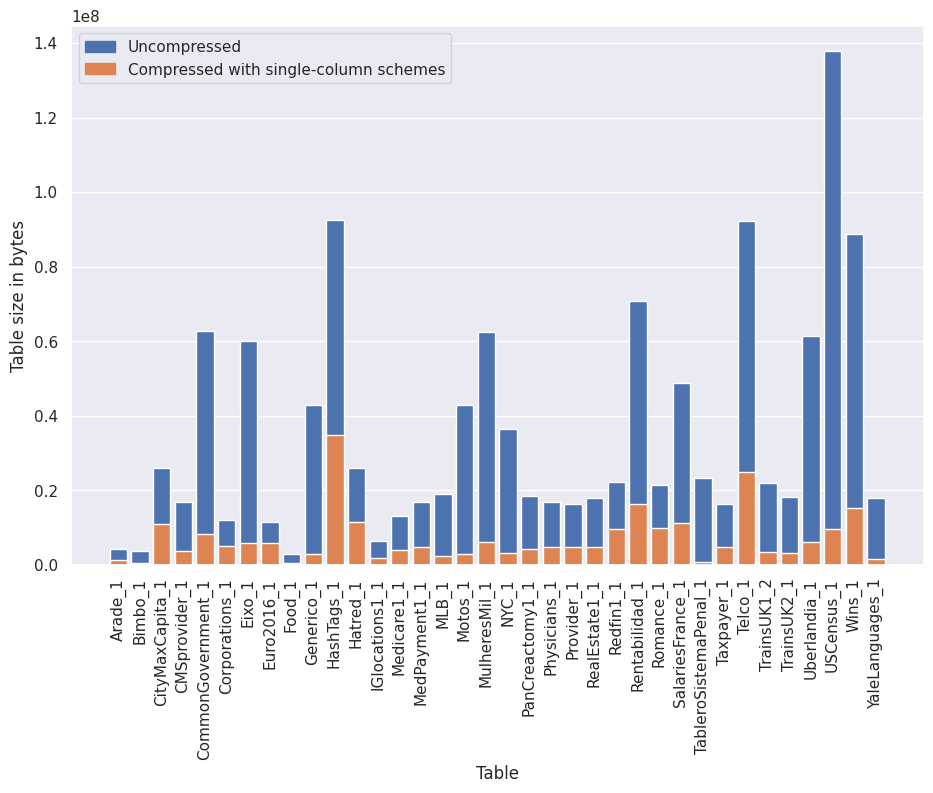

In [325]:
dfs = pd.read_csv(f'../1/relation_stats.csv', delimiter="|", nrows=36)
# dfs["Compression Ratio"] = dfs["uncompressed"]/dfs["compressed"]

# mean = dfs["Compression Ratio"].mean()

# g = sns.barplot(x=dfs["Relation"], y=dfs["Compression Ratio"])
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
# # plt.title("Single-Column Compression Ratios")
# plt.axhline(y=mean, color=sns.color_palette()[0], linestyle='dashed')
# plt.xlabel("Table")

import matplotlib.patches as mpatches

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["uncompressed"])
p = ax.bar(dfs["Relation"], dfs["compressed"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# plt.title("How much C3 improved for each table")
plt.ylabel("Table size in bytes")
plt.xlabel("Table")

# Manual Legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Uncompressed')   
patch2 = mpatches.Patch(color=sns.color_palette()[1], label='Compressed with single-column schemes')   
handles.extend([patch, patch2])
plt.legend(handles=handles)


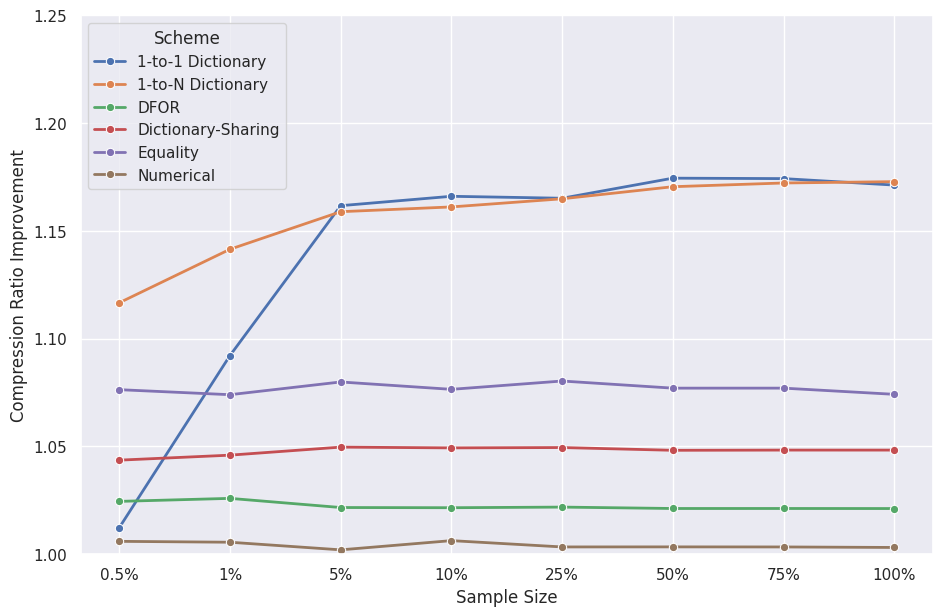

In [272]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]
schemes = ["d1to1", "d1ton", "dfor", "dshare", "equality", "numerical"]
scheme_names = ["1-to-1 Dictionary", "1-to-N Dictionary", "DFOR", "Dictionary-Sharing", "Equality", "Numerical"]
dfs = []
for scheme in schemes:
    scheme_sample_sizes = []
    for sample_size in sample_sizes:
        scheme_sample_sizes.append(pd.read_csv(f'../2/{scheme}/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))
    dfs.append(scheme_sample_sizes)

avg_cris = []
for df in dfs:
    avg_cris.append([sample_size.loc[:,'compression_ratio_improvement'].mean() for sample_size in df])
avg_cris

df = pd.DataFrame(avg_cris)
df = df.transpose()
df = df.set_axis(scheme_names, axis=1)
df["sample_size"] = sample_size_labels

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Scheme', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)
plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Scheme', 
                    marker="o",
                    linewidth = 2,
                    data=df)
# plt.title("CRI of individual C3 schemes")
plt.ylim(1, 1.25)
plt.show(plot)

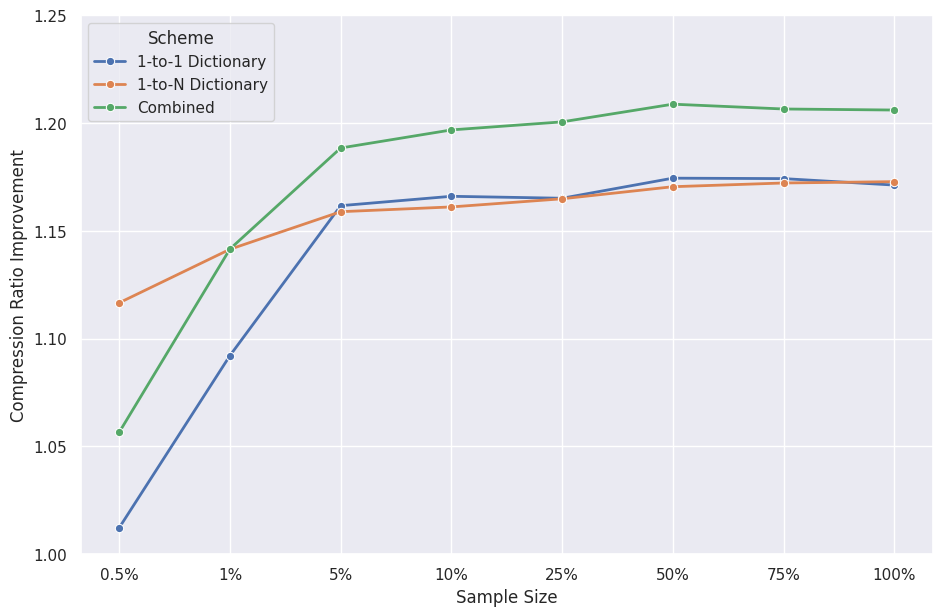

In [273]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]
schemes = ["d1to1", "d1ton"]
scheme_names = ["1-to-1 Dictionary", "1-to-N Dictionary"]
dfs = []
for scheme in schemes:
    scheme_sample_sizes = []
    for sample_size in sample_sizes:
        scheme_sample_sizes.append(pd.read_csv(f'../2/{scheme}/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))
    dfs.append(scheme_sample_sizes)

scheme_names.append("Combined")
dfs.append([pd.read_csv(f'../3/{sample_size}/relation_stats.csv', delimiter="|", nrows=36) for sample_size in sample_sizes])

avg_cris = []
for df in dfs:
    avg_cris.append([sample_size.loc[:,'compression_ratio_improvement'].mean() for sample_size in df])
avg_cris

df = pd.DataFrame(avg_cris)
df = df.transpose()
df = df.set_axis(scheme_names, axis=1)
df["sample_size"] = sample_size_labels

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Scheme', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)
plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Scheme', 
                    marker="o",
                    linewidth = 2,
                    data=df)
# plt.title("CRI of individual C3 schemes")
plt.ylim(1, 1.25)
plt.show(plot)

/tmp/ipykernel_794/467367746.py:36: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  plot = sns.lineplot(x='Sample Size',


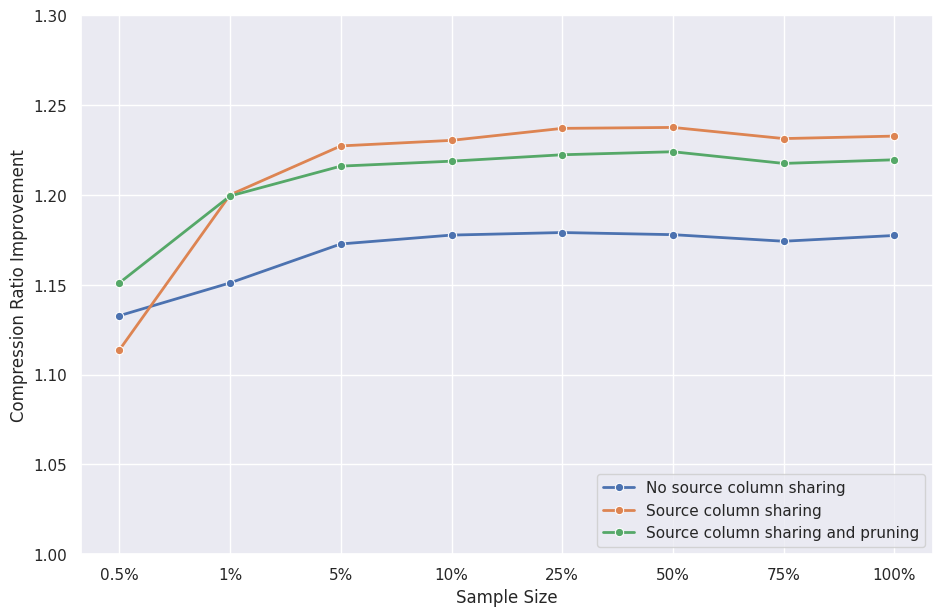

In [340]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]
dfs_no_share = []
for sample_size in sample_sizes:
    dfs_no_share.append(pd.read_csv(f'../4_2/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_pruning = []
for sample_size in sample_sizes:
    dfs_pruning.append(pd.read_csv(f'../6/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_32_sample_run_size = []
for sample_size in sample_sizes:
    dfs_32_sample_run_size.append(pd.read_csv(f'../4_3/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))


avg_cris = []
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_no_share])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_pruning])
# avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_32_sample_run_size])

df = pd.DataFrame(avg_cris)
df = df.transpose()
df["sample_size"] = sample_size_labels

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Pruning', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)
# print(df)
plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Pruning', 
                    marker="o",
                    linewidth = 2,
                    data=df,
                    palette=sns.color_palette()[:4])

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["No source column sharing", "Source column sharing", "Source column sharing and pruning"]
plt.gca().legend(handles, labels, loc=4)

# plt.title("CRI of combined schemes, with and without pruning rules")
plt.ylim(1, 1.3)
plt.show(plot)


/tmp/ipykernel_794/2329263929.py:29: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  plot = sns.lineplot(x='Sample Size',


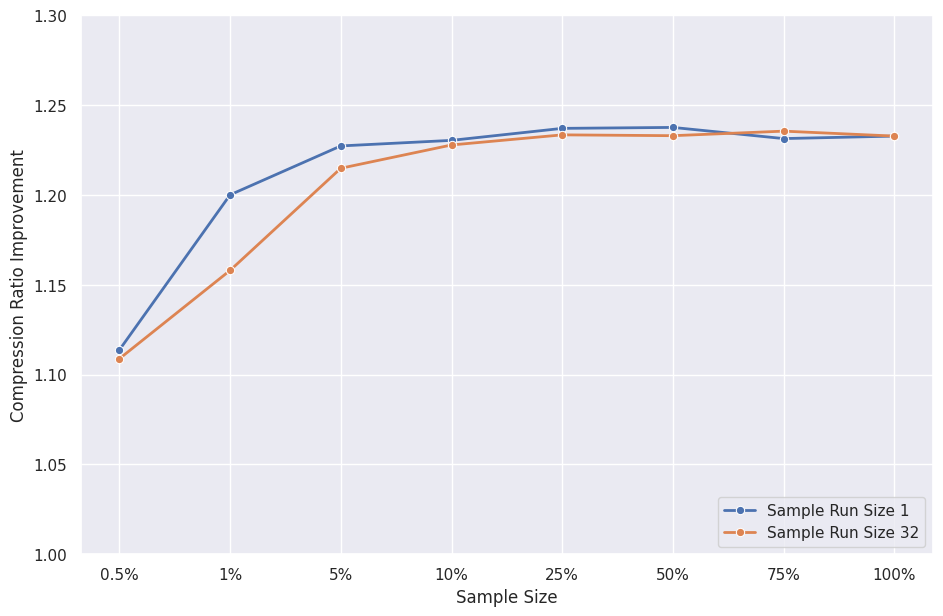

In [319]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]
dfs_no_share = []
for sample_size in sample_sizes:
    dfs_no_share.append(pd.read_csv(f'../4_2/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_32_sample_run_size = []
for sample_size in sample_sizes:
    dfs_32_sample_run_size.append(pd.read_csv(f'../4_3/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

avg_cris = []
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_32_sample_run_size])

df = pd.DataFrame(avg_cris)
df = df.transpose()
df["sample_size"] = sample_size_labels

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Pruning', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)
# print(df)
plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Pruning', 
                    marker="o",
                    linewidth = 2,
                    data=df,
                    palette=sns.color_palette()[:4])

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Sample Run Size 1", "Sample Run Size 32"]
plt.gca().legend(handles, labels, loc=4)

# plt.title("CRI of combined schemes, with and without pruning rules")
plt.ylim(1, 1.3)
plt.show(plot)

([<matplotlib.patches.Wedge at 0x7f0975e045b0>,
 [Text(-0.4876973405365645, 0.9859773344421069, '1-to-N Dictionary'),
  Text(-0.9757697696862567, 0.5078123241576847, 'Dictionary-Sharing'),
  Text(-1.0893227604707005, 0.15289186871934332, 'DFOR'),
  Text(-0.804454898294906, -0.7502348409727001, 'Equality'),
  Text(-0.02255557017901476, -1.099768723984229, 'Numerical'),
  Text(1.099546715404214, 0.031575633703931495, '1-to-1 Dictionary')],
 [Text(-0.2660167312017624, 0.5378058187866037, '14.62%'),
  Text(-0.5322380561925036, 0.2769885404496462, '5.48%'),
  Text(-0.5941760511658366, 0.08339556475600543, '5.35%'),
  Text(-0.43879358088813053, -0.4092190041669273, '22.98%'),
  Text(-0.012303038279462594, -0.5998738494459431, '2.48%'),
  Text(0.5997527538568439, 0.017223072929417178, '49.09%')])

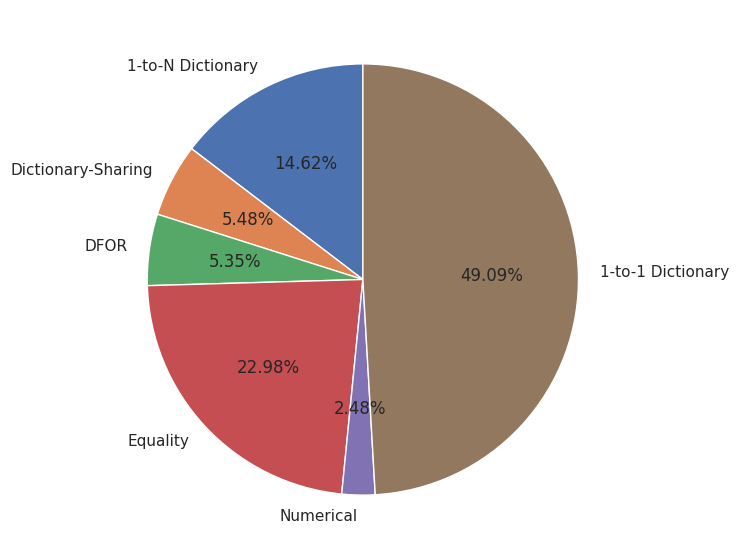

In [252]:
sample_sizes = ["65536"] # ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../4/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

schemes = ["Dict_1toN", "Dict_Sharing", "DFOR", "Equality", "Numerical", "Dict_1to1"]
scheme_names = ["1-to-N Dictionary", "Dictionary-Sharing", "DFOR", "Equality", "Numerical", "1-to-1 Dictionary"]
scheme_counts = dict.fromkeys(schemes, 0)
for i in range(0,len(sample_sizes)):
    for scheme in schemes:
        scheme_counts[scheme] += dfs[i]["C3_Scheme"].value_counts()[scheme]


keys = list(scheme_counts.keys())
vals = [scheme_counts[k] for k in keys]
# plt.title("proportion of each scheme, with 65536 sample size")
plt.pie(vals, labels=scheme_names, startangle=90, autopct='%1.2f%%')

{'Dict_Sharing': 1.0628595714285713, 'Dict_1toN': 1.2033640803571426, 'DFOR': 1.235352268292683, 'Numerical': 1.2964025789473685, 'Dict_1to1': 1.797610335106383, 'Equality': 2.2868841420454546}


(0.0, 2.5)

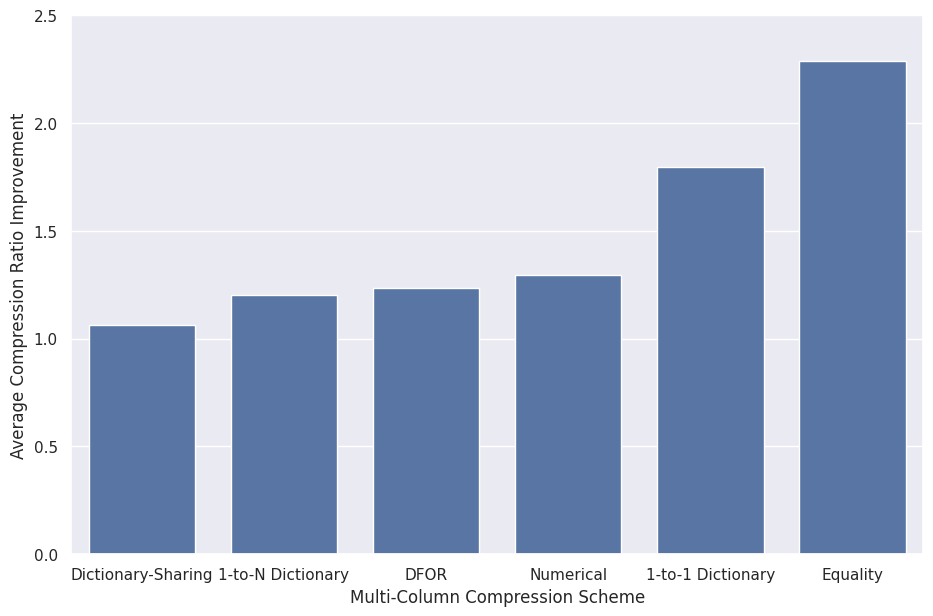

In [345]:
sample_sizes = ["65536"] # ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../4/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

# dfs[0].loc[dfs[0]['C3_Scheme'] == "Equality"]["scheme_total_cr_improvement"].mean()
schemes = ["Dict_Sharing", "Dict_1toN", "DFOR", "Numerical", "Dict_1to1", "Equality"]
scheme_names = ["Dictionary-Sharing", "1-to-N Dictionary", "DFOR", "Numerical", "1-to-1 Dictionary", "Equality"]
scheme_counts = dict.fromkeys(schemes, 0)
for scheme in schemes:
    means = []
    for i in range(0,len(sample_sizes)):
        means.append(dfs[i].loc[dfs[i]['C3_Scheme'] == scheme]["scheme_total_cr_improvement"].mean())
    scheme_counts[scheme] = sum(means) / len(means) 

print(scheme_counts)

# plt.title("Average CRI for each scheme, with 65536 samples, no pruning")
g = sns.barplot(x=scheme_names, y=scheme_counts.values(), width=0.75)
plt.xlabel("Multi-Column Compression Scheme")
plt.ylabel("Average Compression Ratio Improvement")
plt.ylim(0,2.5)

/tmp/ipykernel_794/2515567340.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y=df["pruning"], x=df["Excepted compression ratios computed (in millions)"], palette=colors, width=0.5, orient = 'h').set_title("Excepted compression ratios computed (in millions)")
/tmp/ipykernel_794/2515567340.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y=df["pruning"], x=df["Schemes added to correlation graph (in thousands)"], palette=colors, width=0.5, orient = 'h').set_title("Schemes added to correlation graph (in thousands)")
/tmp/ipykernel_794/2515567340.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

[Text(0.5, 0, '')]

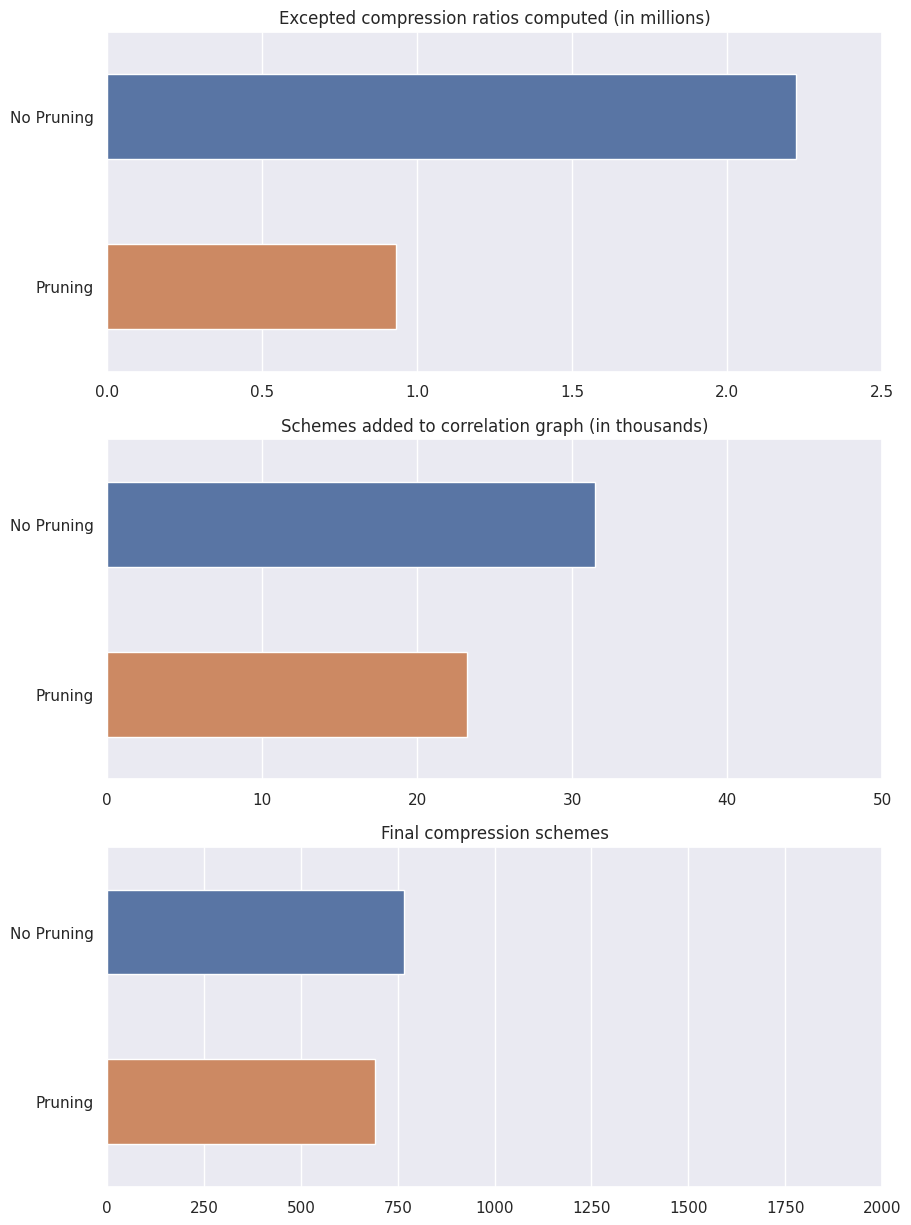

In [253]:
# how many ECR computations can be skipped due to pruning
sample_sizes = ["65536"] # ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../4/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_pruning = []
for sample_size in sample_sizes:
    dfs_pruning.append(pd.read_csv(f'../6/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

d = {"Excepted compression ratios computed (in millions)": [sum(dfs[0]["compute_ecr_counter"]), sum(dfs_pruning[0]["compute_ecr_counter"])],
     "Schemes added to correlation graph (in thousands)": [sum(dfs[0]["add_to_graph_counter"]), sum(dfs_pruning[0]["add_to_graph_counter"])],
     "Final compression schemes used": [sum(dfs[0]["final_scheme_counter"]), sum(dfs_pruning[0]["final_scheme_counter"])]}
df = pd.DataFrame(d)
df["pruning"] = ["No Pruning", "Pruning"]
df["Excepted compression ratios computed (in millions)"] = [x/1000000 for x in df["Excepted compression ratios computed (in millions)"]]
df["Schemes added to correlation graph (in thousands)"] = [x/1000 for x in df["Schemes added to correlation graph (in thousands)"]]
# print(df)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
# fig.tight_layout()
# fig.suptitle("Number of C3 schemes reduced through pruning in each compression stage")

colors = sns.color_palette()[:2]

sns.barplot(ax=axes[0], y=df["pruning"], x=df["Excepted compression ratios computed (in millions)"], palette=colors, width=0.5, orient = 'h').set_title("Excepted compression ratios computed (in millions)")
axes[0].ticklabel_format(style='plain', axis='x')
axes[0].set_xlim(0,2.5)
axes[0].set(ylabel=None)
axes[0].set(xlabel=None)

sns.barplot(ax=axes[1], y=df["pruning"], x=df["Schemes added to correlation graph (in thousands)"], palette=colors, width=0.5, orient = 'h').set_title("Schemes added to correlation graph (in thousands)")
axes[1].set_xlim(0,50)
axes[1].set(ylabel=None)
axes[1].set(xlabel=None)

sns.barplot(ax=axes[2], y=df["pruning"], x=df["Final compression schemes used"], palette=colors, width=0.5, orient = 'h').set_title("Final compression schemes")
axes[2].set_xlim(0,2000)
axes[2].set(ylabel=None)
axes[2].set(xlabel=None)


   Sample Size reversed_or_final  Scheme Count
0         0.5%     final_schemes           762
1           1%     final_schemes           756
2           5%     final_schemes           750
3          10%     final_schemes           728
4          25%     final_schemes           723
5          50%     final_schemes           710
6          75%     final_schemes           717
7         100%     final_schemes           704
8         0.5%         reversals           176
9           1%         reversals            91
10          5%         reversals            32
11         10%         reversals            29
12         25%         reversals             6
13         50%         reversals             0
14         75%         reversals             0
15        100%         reversals             0


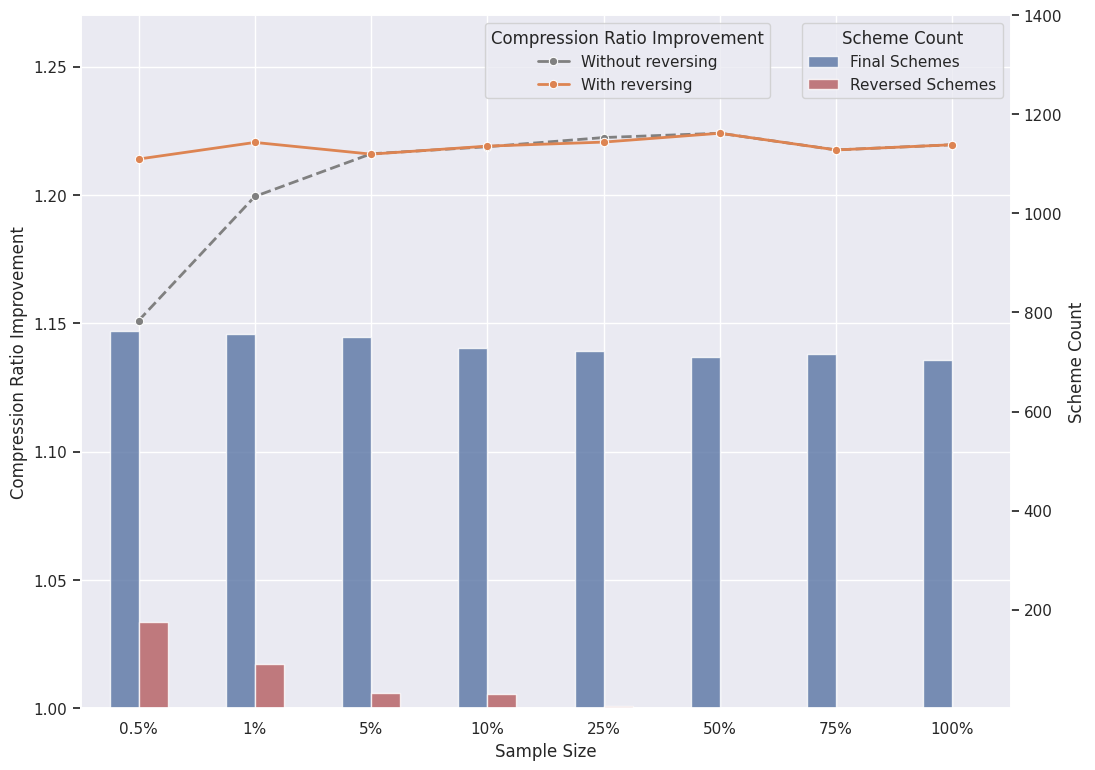

In [280]:
sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]
dfs = []
for sample_size in sample_sizes:
    dfs.append(pd.read_csv(f'../7/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_pruning = []
for sample_size in sample_sizes:
    dfs_pruning.append(pd.read_csv(f'../6/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

avg_cris = []
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_pruning])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs])
avg_cris

df = pd.DataFrame(avg_cris)
df = df.transpose()
df["sample_size"] = sample_size_labels

fig, ax1 = plt.subplots(figsize=(12,9))

# LINE CHART

df_melt = pd.melt(df, ['sample_size'])
df_melt.rename(columns={'variable':'Reversing', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)

plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Reversing', 
                    marker="o",
                    linewidth = 2,
                    data=df_melt,
                    ax=ax1,
                    palette=["grey",sns.color_palette()[1]])
ax1.lines[0].set_linestyle("--")

ax1.set_ylim(1, 1.27)
handles, labels = ax1.get_legend_handles_labels()
labels = ["Without reversing", "With reversing"]
ax1.legend(handles, labels, loc=4, title="Compression Ratio Improvement")
sns.move_legend(ax1, "upper right", bbox_to_anchor=(0.75, 1))

# BAR CHART

df = pd.DataFrame(
    {'final_schemes': [762, 756, 750, 728, 723, 710, 717, 704],
     'reversals': [176, 91, 32, 29, 6, 0, 0, 0],
     'sample_size': sample_size_labels
    })

df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'reversed_or_final',
                   'value': 'Scheme Count',
                   'sample_size':'Sample Size'}, 
                   inplace=True)
print(df)
ax2 = ax1.twinx()
ax2.grid(False)
sns.barplot(data = df, x='Sample Size', y='Scheme Count', hue='reversed_or_final', alpha=0.8, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0],sns.color_palette()[3]])

ax2.set_ylim(1,1400)
handles, labels = ax2.get_legend_handles_labels()
labels = ["Final Schemes", "Reversed Schemes"]
ax2.legend(handles, labels, loc=4, title="Scheme Count")
sns.move_legend(ax2, "upper right", bbox_to_anchor=(1, 1))

# plt.title("CRI of combined schemes, with and without reversing, number of reversals")
# plt.show(plot)

/tmp/ipykernel_794/1830301589.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


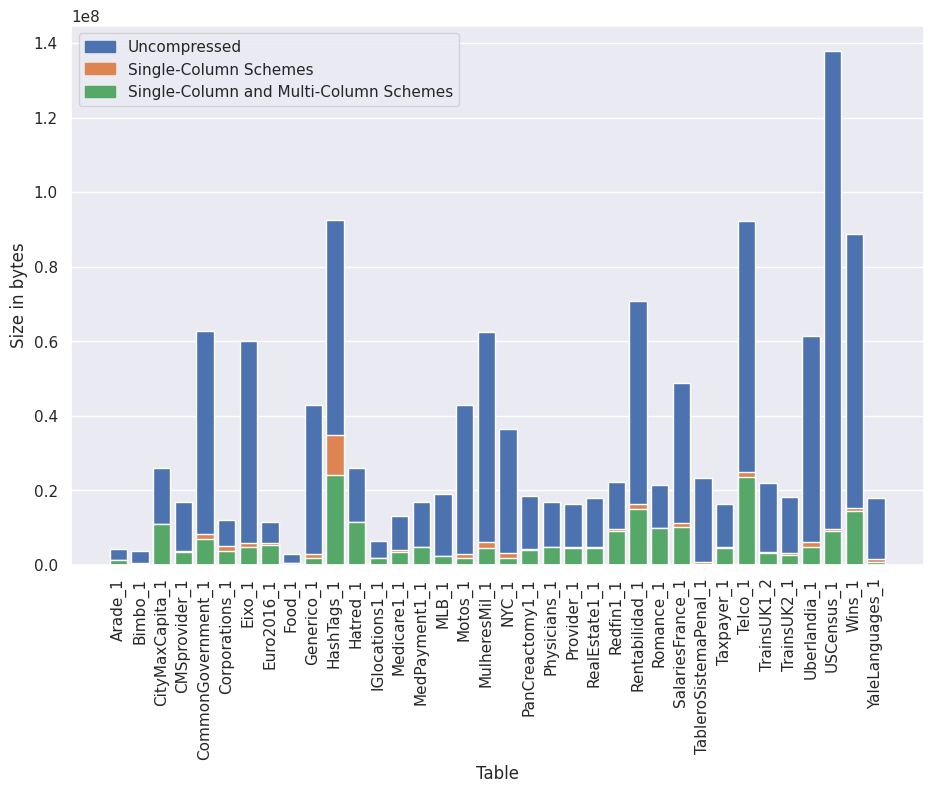

In [334]:
import matplotlib.patches as mpatches

dfs = pd.read_csv(f'../7/655/relation_stats.csv', delimiter="|", nrows=36)

# dfs["compression_ratio"] = dfs["uncompressed"] / dfs["compressed"]
# dfs["c3_compression_ratio"] = dfs["compression_ratio"] * dfs["compression_ratio_improvement"]
# dfs["c3_compression_ratio_improvement"] = dfs["c3_compression_ratio"] - dfs["compression_ratio"]

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["uncompressed"])
p = ax.bar(dfs["Relation"], dfs["compressed"])
p = ax.bar(dfs["Relation"], dfs["c3_compressed"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# mean = dfs["compression_ratio"].mean()
# c3_mean = dfs["c3_compression_ratio"].mean()
# print(mean)
# print(c3_mean)
# plt.axhline(y=mean, color=sns.color_palette()[0], linestyle='dashed')
# plt.axhline(y=c3_mean, color=sns.color_palette()[1], linestyle='dashed')

# plt.title("How much C3 improved for each table")
plt.ylabel("Size in bytes")
plt.xlabel("Table")

# Manual Legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Uncompressed')   
patch2 = mpatches.Patch(color=sns.color_palette()[1], label='Single-Column Schemes')   
patch3 = mpatches.Patch(color=sns.color_palette()[2], label='Single-Column and Multi-Column Schemes')   
handles.extend([patch, patch2, patch3])
plt.legend(handles=handles)


/tmp/ipykernel_794/1394357727.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


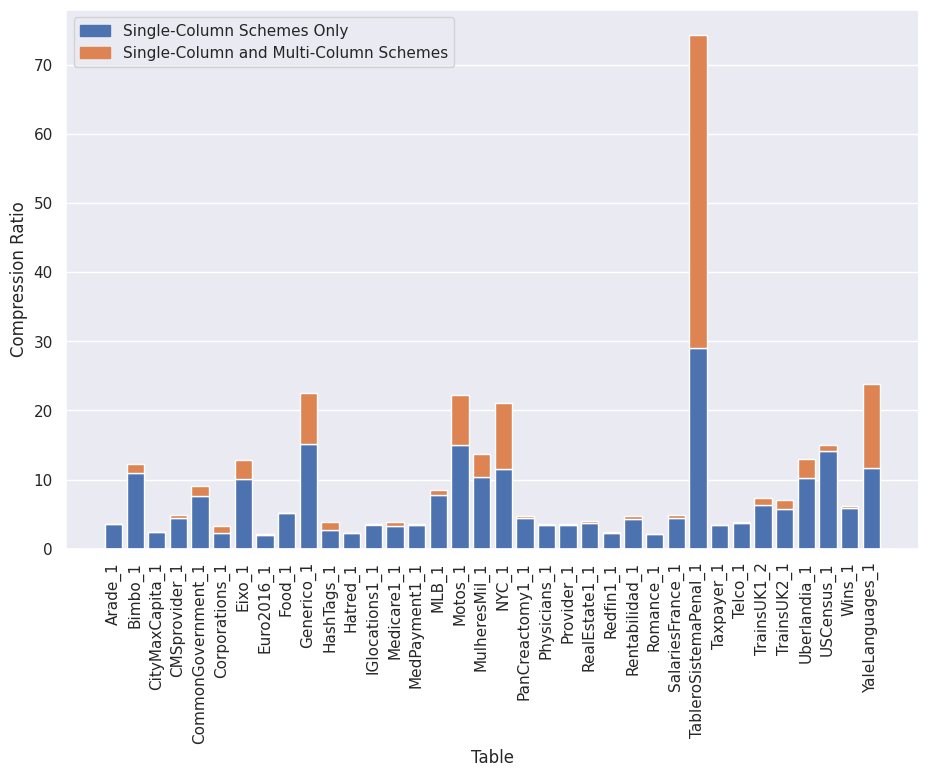

In [332]:
import matplotlib.patches as mpatches

dfs = pd.read_csv(f'../7/655/relation_stats.csv', delimiter="|", nrows=36)

dfs["compression_ratio"] = dfs["uncompressed"] / dfs["compressed"]
dfs["c3_compression_ratio"] = dfs["compression_ratio"] * dfs["compression_ratio_improvement"]
dfs["c3_compression_ratio_improvement"] = dfs["c3_compression_ratio"] - dfs["compression_ratio"]

fig, ax = plt.subplots()

p = ax.bar(dfs["Relation"], dfs["compression_ratio"])
p = ax.bar(dfs["Relation"], dfs["c3_compression_ratio_improvement"], bottom=dfs["compression_ratio"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.grid(False)

# mean = dfs["compression_ratio"].mean()
# c3_mean = dfs["c3_compression_ratio"].mean()
# print(mean)
# print(c3_mean)
# plt.axhline(y=mean, color=sns.color_palette()[0], linestyle='dashed')
# plt.axhline(y=c3_mean, color=sns.color_palette()[1], linestyle='dashed')

# plt.title("How much C3 improved for each table")
plt.ylabel("Compression Ratio")
plt.xlabel("Table")

# Manual Legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Single-Column Schemes Only')   
patch2 = mpatches.Patch(color=sns.color_palette()[1], label='Single-Column and Multi-Column Schemes')   
handles.extend([patch, patch2])
plt.legend(handles=handles)


/tmp/ipykernel_794/3277397604.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Scheme Sharing Mode', y='Excepted Compression Ratios Computed (in millions)', alpha=1, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0]])
/tmp/ipykernel_794/3277397604.py:35: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = df, x='Scheme Sharing Mode', y='Excepted Compression Ratios Computed (in millions)', alpha=1, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0]])


9.13888888888889

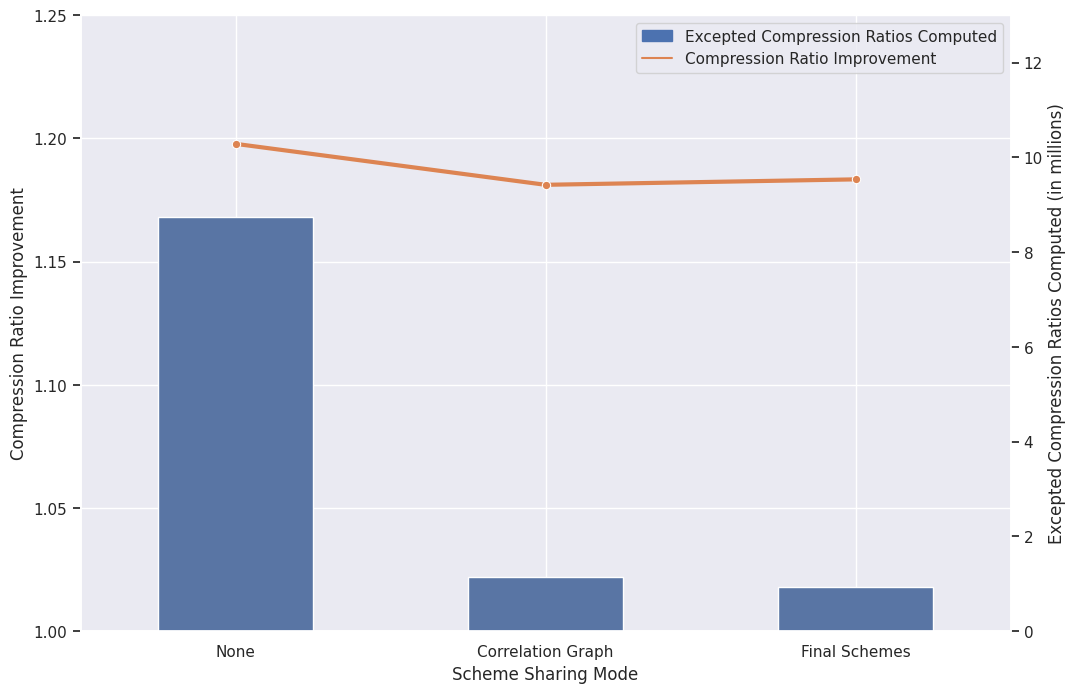

In [321]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

scheme_sharing_options = [0,2,1]
dfs = []
for options in scheme_sharing_options:
    dfs.append(pd.read_csv(f'../9/{options}/relation_stats.csv', delimiter="|", nrows=36))

avg_cris = []
total_ecrs = []
for df in dfs:
    avg_cris.append(df['compression_ratio_improvement'].mean())
    total_ecrs.append(df['compute_ecr_counter'].sum())
avg_cris

df = pd.DataFrame(avg_cris, columns=["Compression Ratio Improvement"])
df["Scheme Sharing Mode"] = ["None", "Correlation Graph", "Final Schemes"]
df["Excepted Compression Ratios Computed (in millions)"] = [x/1000000 for x in total_ecrs]
# print(df)

fig, ax1 = plt.subplots(figsize=(12,8))

# LINE PLOT
sns.lineplot(x=df["Scheme Sharing Mode"], 
             y=df["Compression Ratio Improvement"],
             ax=ax1,
             marker="o",
             linewidth = 3,
             color=sns.color_palette()[1])
ax1.set_ylim(1, 1.25)

# BAR PLOT
ax2 = ax1.twinx()
ax2.grid(False)
sns.barplot(data = df, x='Scheme Sharing Mode', y='Excepted Compression Ratios Computed (in millions)', alpha=1, ax=ax2, errorbar=None, width=0.5, palette=[sns.color_palette()[0]])
ax2.set_ylim(0,13)
ax2.ticklabel_format(style='plain', axis='y')

# Manual Legend
handles, labels = ax2.get_legend_handles_labels()
patch = mpatches.Patch(color=sns.color_palette()[0], label='Excepted Compression Ratios Computed')   
line = Line2D([0], [0], label='Compression Ratio Improvement', color=sns.color_palette()[1])
handles.extend([patch, line])
plt.legend(handles=handles)

foo = pd.read_csv(f'../9/0/row_group_stats.csv', delimiter="|")


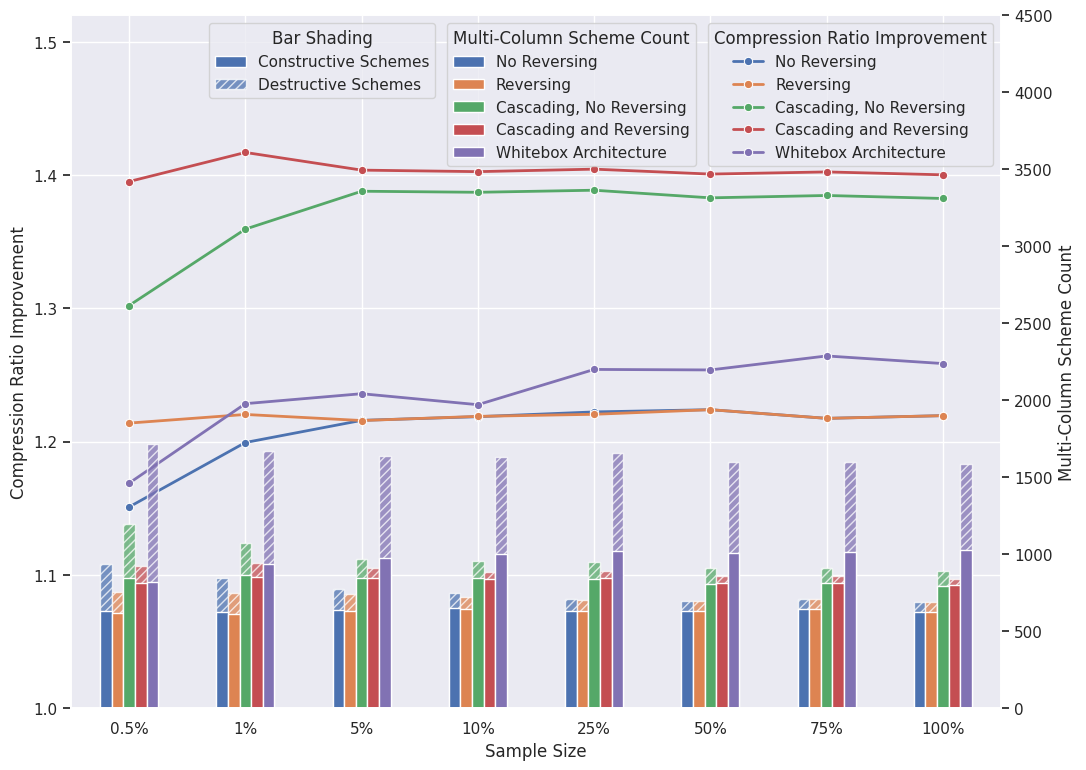

In [277]:
# compare without reversing, with reversing, with cascading and reversing, whitebox
# whitebox should start worse than without reversing, end bewteen reversing and cascading

sample_sizes = ["327", "655", "3276", "6553", "16384", "32768", "49152", "65536"]
sample_size_labels = ["0.5%", "1%", "5%", "10%", "25%", "50%", "75%", "100%"]

fig, ax1 = plt.subplots(figsize=(12,9))

# LINE GRAPH

dfs_no_reverse = []
for sample_size in sample_sizes:
    dfs_no_reverse.append(pd.read_csv(f'../6/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_reverse = []
for sample_size in sample_sizes:
    dfs_reverse.append(pd.read_csv(f'../7/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_cascaded = []
for sample_size in sample_sizes:
    dfs_cascaded.append(pd.read_csv(f'../10/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_cascaded_no_reverse = []
for sample_size in sample_sizes:
    dfs_cascaded_no_reverse.append(pd.read_csv(f'../10_2/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

dfs_whitebox = []
for sample_size in sample_sizes:
    dfs_whitebox.append(pd.read_csv(f'../11/{sample_size}/relation_stats.csv', delimiter="|", nrows=36))

avg_cris = []
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_no_reverse])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_reverse])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_cascaded_no_reverse])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_cascaded])
avg_cris.append([df['compression_ratio_improvement'].mean() for df in dfs_whitebox])

df = pd.DataFrame(avg_cris)
df = df.transpose()
df["sample_size"] = sample_size_labels
df = pd.melt(df, ['sample_size'])
df.rename(columns={'variable':'Cascading_On_Off', 
                   'value':'Compression Ratio Improvement',
                   'sample_size':'Sample Size'}, 
                   inplace=True)

plot = sns.lineplot(x='Sample Size', 
                    y='Compression Ratio Improvement', 
                    hue='Cascading_On_Off', 
                    marker="o",
                    linewidth = 2,
                    data=df,
                    palette=sns.color_palette()[:5],
                    ax=ax1)

handles, labels = ax1.get_legend_handles_labels()
graph_labels = ["No Reversing", "Reversing", "Cascading, No Reversing", "Cascading and Reversing", "Whitebox Architecture"]
ax1.legend(handles, graph_labels, loc=4, title="Compression Ratio Improvement")
sns.move_legend(ax1, "upper right", bbox_to_anchor=(1, 1))

ax1.set_ylim(1, 1.52)

# BAR GRAPH

dfs_no_reverse = []
for sample_size in sample_sizes:
    dfs_no_reverse.append(pd.read_csv(f'../6/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

dfs_reverse = []
for sample_size in sample_sizes:
    dfs_reverse.append(pd.read_csv(f'../7/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

dfs_cascaded = []
for sample_size in sample_sizes:
    dfs_cascaded.append(pd.read_csv(f'../10/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

dfs_cascaded_no_reverse = []
for sample_size in sample_sizes:
    dfs_cascaded_no_reverse.append(pd.read_csv(f'../10_2/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

dfs_whitebox = []
for sample_size in sample_sizes:
    dfs_whitebox.append(pd.read_csv(f'../11/{sample_size}/scheme_stats.csv', delimiter="|", index_col=False))

bad_scheme_counts = []
bad_scheme_counts.append([len([i for i in [i for i in df['scheme_total_cr_improvement']] if float(i) < 1]) for df in dfs_no_reverse])
bad_scheme_counts.append([len([i for i in [i for i in df['scheme_total_cr_improvement']] if float(i) < 1]) for df in dfs_reverse])
bad_scheme_counts.append([len([i for i in [i for i in df['scheme_total_cr_improvement']] if float(i) < 1]) for df in dfs_cascaded_no_reverse])
bad_scheme_counts.append([len([i for i in [i for i in df['scheme_total_cr_improvement']] if float(i) < 1]) for df in dfs_cascaded])
bad_scheme_counts.append([len([i for i in [i for i in df['scheme_total_cr_improvement']] if float(i) < 1]) for df in dfs_whitebox])

total_scheme_counts = []
total_scheme_counts.append([len(df['scheme_total_cr_improvement']) for df in dfs_no_reverse])
total_scheme_counts.append([len(df['scheme_total_cr_improvement']) for df in dfs_reverse])
total_scheme_counts.append([len(df['scheme_total_cr_improvement']) for df in dfs_cascaded_no_reverse])
total_scheme_counts.append([len(df['scheme_total_cr_improvement']) for df in dfs_cascaded])
total_scheme_counts.append([len(df['scheme_total_cr_improvement']) for df in dfs_whitebox])

bad_scheme_counts = [[y-x for x, y in zip(x1, x2)] for x1, x2 in zip(bad_scheme_counts, total_scheme_counts)]

df = pd.DataFrame(bad_scheme_counts)
df = df.transpose()
df["sample_size"] = sample_size_labels

# add bar graph with number of bad schemes for each line
ax2 = ax1.twinx()

df2 = pd.DataFrame(total_scheme_counts)
df2 = df2.transpose()
df2["sample_size"] = sample_size_labels

df2.plot(kind='bar', ax=ax2, x='sample_size', alpha=0.75, hatch="////", color=sns.color_palette()[:5])
df.plot(kind='bar', ax=ax2, x='sample_size', color=sns.color_palette()[:5])
ax2.set_ylabel("Multi-Column Scheme Count")
ax2.grid(False)
ax2.set_ylim(0,4500)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[5:10], graph_labels, loc=4, title="Multi-Column Scheme Count")
sns.move_legend(ax2, "upper right", bbox_to_anchor=(0.68, 1))

ax3 = ax1.twinx()
ax3.grid(False)
ax3.legend([handles[5],handles[0]], ["Constructive Schemes", "Destructive Schemes"], loc=4, title="Bar Shading")
sns.move_legend(ax3, "upper right", bbox_to_anchor=(0.4, 1))
ax3.set(yticklabels=[])  # remove the tick labels
ax3.tick_params(right=False) # remove ticks


In [ ]:
# more analysis ideas:

# already have data:
# number of exceptions for dict1to1 and equality
# which data type combinations have most/most effective schemes
# how many columns compressed with single-col, how many with multi-col schemes

# need more data:

In [339]:
dfs = pd.read_csv(f'../7/655/relation_stats.csv', delimiter="|", nrows=36)

# Compression ratio improvement for entire dataset
# bad: skewed by large table sizes
uncompressed_size = sum(dfs["uncompressed"])
bb_compressed_size = sum(dfs["compressed"])
c3_compressed_size = sum(dfs["c3_compressed"])
print(bb_compressed_size/c3_compressed_size)

# Average CRI of tables
print(dfs["compression_ratio_improvement"].mean())

# Improvement of average compression ratio of tables
# bad: skewed by large CRs (2.0 * 70CR has much larger effect than 2.0 * 5CR)
avg_bb_cr = sum(dfs["uncompressed"]/dfs["compressed"])/len(dfs)
avg_c3_cr = sum(dfs["uncompressed"]/dfs["c3_compressed"])/len(dfs)
print(avg_c3_cr/avg_bb_cr)

# print(uncompressed_size/bb_compressed_size)
# print(uncompressed_size/c3_compressed_size)

# on average, table 14% smaller with C3
size_saved = [1- x for x in dfs["c3_compressed"]/dfs["compressed"]]
sum(size_saved)/len(size_saved)


1.1438701182484508
1.2204530555555557
1.4241850043831499


AttributeError: 'list' object has no attribute 'mean'